In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

YOUR_IMAGE_PATH = "C:\\Users\\syoo9\\화재감지시스템\\적외선영상.png"
im = pilimg.open(YOUR_IMAGE_PATH)

#픽셀데이터를 array로, 이미지의 너비, 높이 RGB값
pix = np.array(im)
pix.shape

(296, 339, 3)

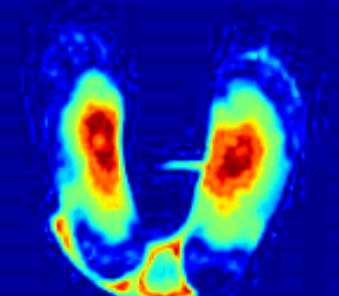

In [2]:
im
#적외선영상.png 출력

In [3]:
#위 사진을 다시 저장
from PIL import Image
#PIL == python image library
im = Image.fromarray(pix) #arrary를 이미지화
im.save("C:\\Users\\syoo9\\화재감지시스템\\적외선_테스트.png")

In [4]:
import pandas as pd
data = pd.read_csv('온도.csv', sep=",")
arr_cel = np.asarray(data.온도)
arr_cel = arr_cel.reshape(1000,1)
arr_cel.shape

data.head()


,번호,온도
0,1,19.374425
1,2,33.998988
2,3,18.681899
3,4,30.741560
4,5,21.291808


In [5]:
#테스트 사진들의 온도 데이터는 온도.csv에, 1000개 데이터
#사진의 크기는 일정해야함, max 크기를 대략 구해서 입력 크기 결정하기
all_file_dim = []

for i in range(0,1000):
    filename = '적외선영상_' + str(i+1) + '.png'
    YOUR_IMAGE_PATH = "C:\\Users\\syoo9\\화재감지시스템\\YANG\\" + filename 
    
    # 이미지 읽어온다. 
    im = pilimg.open(YOUR_IMAGE_PATH)

    # 이미지보여주기
    #im.show()
    #print(filename)
    # Fetch image pixel data to numpy array
    pix = np.array(im)
    
    #0~1사이의 값으로 나타낸다. 
    pix = pix/255
    
    #각각의 차원을 계산해본다. 
    dim = pix.shape
    all_file_dim.append(dim) 
    
import pandas as pd 
frame = pd.DataFrame(all_file_dim , columns = ['x','y'])

np.max(frame.x) , np.max(frame.y) #max값 197,195  input 대략 200,200 으로 통일

(197, 195)

In [6]:
import PIL.Image as pilimg
import numpy as np

pix_all = [] 

for i in range(0,1000):
    filename = '적외선영상_' + str(i+1) + '.png'
    YOUR_IMAGE_PATH = "C:\\Users\\syoo9\\화재감지시스템\\YANG\\" + filename 
    
    # 이미지를 읽어온다. 
    im = pilimg.open(YOUR_IMAGE_PATH)

    #print(filename)
    
    # 이미지데이터를 array로 바꾸면서 0~1사이의 값으로 바꾼다. 
    pix = np.array(im)
    pix = pix/255
    
    # 200*200 size에 맞게 복사한다. 
    width , height = pix.shape
    pix2 = np.zeros((200, 200))
    pix2[:width,:height] = pix
    pix2 = pix2.reshape(200,200,1) 
    
    # 한개의 이미지를 pix_all에 삽입한다. 
    pix_all.append(pix2)

# array로 바꾼다.     
arr_pix_all = np.asarray(pix_all)

In [7]:
cnt = 1
pix_train = [] 
pix_test = [] 
pix_valid = [] 

for i in arr_pix_all:
       
    if cnt <= 600:
        pix_train.append(i)
    elif cnt > 600 and cnt <= 900:
        pix_valid.append(i)
    else:
        pix_test.append(i)
        
    #print(cnt) 
    cnt += 1

arr_pix_train = np.asarray(pix_train)
arr_pix_test = np.asarray(pix_test)
arr_pix_valid = np.asarray(pix_valid)

In [8]:
cnt = 1
cel_train = [] 
cel_test = [] 
cel_valid = [] 

for i in arr_cel:
       
    if cnt <= 600:
        cel_train.append(i)
    elif cnt > 600 and cnt <= 900:
        cel_valid.append(i)
    else:
        cel_test.append(i)
        
    #print(cnt) 
    cnt += 1

arr_cel_train = np.asarray(cel_train)
arr_cel_test = np.asarray(cel_test)
arr_cel_valid = np.asarray(cel_valid)

In [9]:
print(arr_pix_train.shape , arr_pix_test.shape , arr_pix_valid.shape)
print(arr_cel_train.shape , arr_cel_test.shape , arr_pix_valid.shape)

(600, 200, 200, 1) (100, 200, 200, 1) (300, 200, 200, 1)
(600, 1) (100, 1) (300, 200, 200, 1)


In [10]:
# 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D

#이미지의 크기 세팅 
width = 200
height = 200

x_train, y_train = arr_pix_train , arr_cel_train
x_val, y_val = arr_pix_valid , arr_cel_valid
x_test, y_test = arr_pix_test , arr_cel_test

# 모델 구성하기
model = Sequential()
model.add(Conv2D(64,(3,3) , activation='relu' , input_shape=(width,height,1))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3) , activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(512 , activation='relu')) 
model.add(Dense(1)) 

# 컴파일
model.compile(loss='mse', optimizer='adam')

# 학습 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Using TensorFlow backend.


Train on 600 samples, validate on 300 samples
Epoch 1/30
600/600 [==============================] - 24s 39ms/step - loss: 266.8334 - val_loss: 57.6653
Epoch 2/30
600/600 [==============================] - 23s 39ms/step - loss: 51.2068 - val_loss: 50.4147
Epoch 3/30
600/600 [==============================] - 23s 39ms/step - loss: 45.9455 - val_loss: 50.4056
Epoch 4/30
600/600 [==============================] - 23s 39ms/step - loss: 40.4944 - val_loss: 44.3022
Epoch 5/30
600/600 [==============================] - 23s 39ms/step - loss: 37.0645 - val_loss: 50.6026
Epoch 6/30
600/600 [==============================] - 23s 39ms/step - loss: 38.5078 - val_loss: 43.4327
Epoch 7/30
600/600 [==============================] - 23s 39ms/step - loss: 32.0544 - val_loss: 47.4644
Epoch 8/30
600/600 [==============================] - 23s 39ms/step - loss: 30.8048 - val_loss: 42.1765
Epoch 9/30
600/600 [==============================] - 23s 39ms/step - loss: 27.2664 - val_loss: 43.8926
Epoch 10/30
600/6

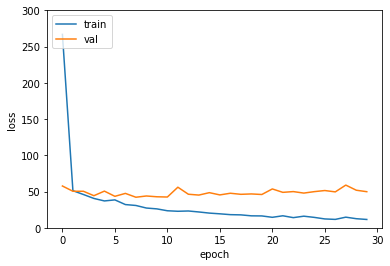

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()